# Stuff I Like About The Julia Programming Language

`git_club 2020-06-19` - Hannes

[View this notebook online](https://nbviewer.jupyter.org/github/Hasnep/stuff-i-like-about-julia/blob/master/stuff-i-like-about-julia.ipynb)

> Julia's unofficial tagline is "Looks like Python, feels like Lisp, runs like Fortran."
> I've been learning Julia for slightly less than a year now, and I'd like to share some of the things I've enjoyed about it.
> I'll give an overview of the language's main features with code examples and discuss whether it really is the future scientific computing.

Technically:
> Julia is a high level, JIT compiled, dynamic language designed with multiple dispatch, automatic differentiation and metaprogramming.

In practice:
> Julia finds a balance between being fast and easy to use with lots of features you'll miss when you use another language.

## History

- Julia was started in 2009 by Jeff Bezanson, Stefan Karpinski, Viral B. Shah, and Alan Edelman
- Announced in 2012
- Version 1.0 was released in 2018
- Now on version 1.4, heading for 1.5 soon

## Julia is easy to use

Let's write a function from scratch to sum an array of numbers, first in Python:
```python
def my_sum(array):
    """
    Sum a list.
    """
    total = 0
    for x in array:
        total += x
    return total
```

Then in Julia:

In [1]:
"""
Sum an array.
"""
function my_sum(array)
    total = 0
    for x in array
        total += x
    end
    return total
end

Main.##302.my_sum

This syntax will be familliar if you've used Python.

In [2]:
my_sum(1:10)

55

Benchmarks for this function in different languages:
- C: ~10ms
- Python: ~500ms
- Julia: ~10ms
> Source: [An Introduction to Julia (Beginner Level) | SciPy 2018 Tutorial | Jane Herriman, Sacha Verweij](https://www.youtube.com/watch?v=b5xvVyzUnXI)

## It's fast

Julia was designed to solve the "two language problem", where researchers use a slower, high-level language for research and then have to use a slower, low-level language once they hit a bottleneck or for production.
Julia is both languages at the same time!

Some benchmarks (from the Julia website) of different languages relative to C.
![Benchmarks of different languages relative to C](https://julialang.org/assets/benchmarks/benchmarks.svg)
> Source: https://julialang.org/benchmarks/

These benchmarks try to compare implementations of the same algorithm.
Julia is comparable to compiled languages like Rust, Go, Fortran, etc. and is sometimes faster than C.
Python is sometimes 100x slower than C.
R is a bit slower than that.

How is it so fast?

Generally languages fall into two categories:

- Compiled languages like C or Rust compile all the code before you run
- Interpreted languages like Python or R don't compile

Julia uses a _Just-In-Time_ (JIT) compiler which compiles a function the first time it is called.

In my opinion, speed doesn't matter all that much

- JIT compilation takes a short while
- My time is more valuable than the computer's time

Now, back to some code!

## Dynamically typed

Let's write a function to calculate the $n$th Fibonacci number.
We want the input `n` to only allow integers and we want to specify the output should only be integers.

In [3]:
"""
Calculate the nth Fibonacci number.
"""
function fib(n::Integer)::Integer
    if n < 2
        return n
    else
        return fib(n - 1) + fib(n - 2)
    end
end

Main.##302.fib

If we try to run the function with a non-integer input

```julia
julia> fib(0.5)
```

Julia will throw an error:

```
ERROR: MethodError: no method matching fib(::Float64)
Closest candidates are:
  fib(::Integer)
```

In [4]:
fib(20)

6765

There is also a one-line function notation that is useful for short functions

In [5]:
short_fib(n::Integer)::Integer = n < 2 ? n : short_fib(n - 1) + short_fib(n - 2)

short_fib(20)

6765

## It's free!

Julia is MIT licenced.

## Broadcasting

In Python, most functions accept one element.
Running this code:
```python
>>> import math
>>> math.sin([1, 2, 3])
```
will give this error:
```
TypeError: must be real number, not list
```
Pythonistas would probably use a list comprehension:
```python
>>> [math.sin(x) for x in [1, 2, 3]]
```
or a map:
```python
>>> map(math.sin, [1, 2, 3])
```
```
[0.8414709848078965, 0.9092974268256817, 0.1411200080598672]
```

In R, most functions are vectorised
```R
> sin(c(1, 2, 3))
```
```
[1] 0.8414710 0.9092974 0.1411200
```

In Julia, functions are not vectorised, for example, this line:
```julia
julia> sin([1, 2, 3])
```
gives this error:
```
ERROR: MethodError: no method matching sin(::Array{Int64,1})
```

Using the broadcast operator, the funciton is applied elementwise!

In [6]:
sin.([1, 2, 3])

3-element Array{Float64,1}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

Broadcasting even works for user functions

In [7]:
fib.(1:10)

10-element Array{Int64,1}:
  1
  1
  2
  3
  5
  8
 13
 21
 34
 55

And for operators:

In [8]:
# What are the first 10 square numbers?
(1:10).^2

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

This is powerful, but sometimes tricky syntax.
For example, adding a dot makes the length function broadcast over the array:

In [9]:
length(split("How many words are in this sentence?"))

7

+

In [10]:
length.(split("How many characters are each of these words?"))

8-element Array{Int64,1}:
  3
  4
 10
  3
  4
  2
  5
  6

## Useful Unicode characters

Julia lets you type lots of symbols using LaTeX-y abbreviations, e.g. type `\alpha` and press tab for α or `\sqrt` and tab for √.

In [11]:
α = 37

37

The square root symbol is an abbreviation for the `sqrt()` function:

In [12]:
√α

6.082762530298219

Some constants like π for pi and ℯ for Euler's constant are predefined:

In [13]:
# Use the approximate equals sign ≈ because this calculation is not exact
ℯ^(im * π) ≈ -1

true

You can define your own operators using either built in functions:

In [14]:
const ⊂ = issubset
[2, 5] ⊂ [1, 2, 3, 4, 5]

true

or user functions:

In [15]:
const ∑ = my_sum
∑(1:10)

55

Because Julia supports almost any symbol you can type as a variable name, that includes emojis!

In [16]:
🔥 = 10
🐶 = 20
🌭 = 30
🔥 + 🐶 == 🌭

true

## Julia is (mostly) written in Julia

If you can read Julia code, you can also read Julia's source code to understand what it does.
I looked at the most recent PR as an example:

In [17]:
tensor(A::AbstractArray, B::AbstractArray) = [a * b for a in A, b in B]
const ⊗ = tensor

tensor (generic function with 1 method)

In [18]:
[1, 2] ⊗ [3, 4, 5]

2×3 Array{Int64,2}:
 3  4   5
 6  8  10

Python's numpy is fast because it's mostly written in C/C++ (51.4%), but if you want to do something that numpy can't do, you need to either use C++ or write slower Python code.

This bridges the gap between a Julia user and a Julia developer.
For every user of Julia, there's another possible contributer.

## Multiple dispatch

As an example, let's build a small Julia package based on [Measurements.jl](https://github.com/JuliaPhysics/Measurements.jl/).

In [19]:
"""
A number with some error.
"""
struct Uncertain <: Real
    val::Real
    err::Real
end

Main.##302.Uncertain

Define the standard gravity on earth.

In [20]:
g = Uncertain(9.8, 0.1)

Main.##302.Uncertain(9.8, 0.1)

Wouldn't it be nicer to show an uncertain number with the plus/minus symbol?
Let's write a show function that dispatches on the Uncertain type:

In [21]:
Base.show(io::IO, x::Uncertain) = print(io, "$(x.val) ∓ $(x.err)")

g

9.8 ∓ 0.1

Let's define the plus/minus operator to create `Uncertain` numbers:

In [22]:
∓(a::Real, b::Real) = Uncertain(a, b)
my_height = 190 ∓ 1

190 ∓ 1

How do you add two uncertain measurements?

In [23]:
my_brothers_height = 175 ∓ 2

175 ∓ 2

```julia
julia> my_height + my_brothers_height
```
```
ERROR: + not defined for Uncertain
```

$$
Q = a + b \\
{\delta Q} = \sqrt{(\delta a)^2 + (\delta b)^2}
$$

In [24]:
Base.:+(a::Uncertain, b::Uncertain) = (a.val + b.val) ∓ sqrt(a.err^2 + b.err^2)
my_height + my_brothers_height

365 ∓ 2.23606797749979

Similar for subtraction.

In [25]:
Base.:-(a::Uncertain, b::Uncertain) = (a.val - b.val) ∓ sqrt(a.err^2 + b.err^2)
my_height - my_brothers_height

15 ∓ 2.23606797749979

Slightly more complicated for multiplcation and division.

In [26]:
function Base.:*(a::Uncertain, b::Uncertain)
    total_value = a.val * b.val
    total_error = total_value * sqrt((a.err / a.val)^2 + (b.err / b.val)^2)
    return Uncertain(total_value, total_error)
end

function Base.:/(a::Uncertain, b::Uncertain)
    total_value = a.val / b.val
    total_error = total_value * sqrt((a.err / a.val)^2 + (b.err / b.val)^2)
    return Uncertain(total_value, total_error)
end

In [27]:
my_height * my_brothers_height

33250 ∓ 418.35989291517893

In [28]:
my_height / my_brothers_height

1.0857142857142856 ∓ 0.013660731197230332

Finally powers, again the exact formula is not important.

In [29]:
Base.:^(a::Uncertain, b::Real) = (a.val^b) ∓ (abs(b) * a.val^(b - 1) * a.err)
my_height^2.0

36100.0 ∓ 380.0

Finally, we need to tell Julia what to do if we give it an `Uncertain` number and some other number in the same operation.

```julia
julia> 1 + g
```
```
ERROR: promotion of types Int64 and Uncertain failed to change any arguments
```

We want to convert both numbers to our `Uncertain` type:

In [30]:
Base.promote_rule(::Type{Uncertain}, ::Type{T}) where T <: Real = Uncertain

Coverting a real number to our Uncertain type just means we add an error of 0:

In [31]:
Base.convert(::Type{Uncertain}, x::Real) = Uncertain(x, 0)

When Julia wants to convert an Uncertain number it doesn't need to do anything :

In [32]:
Base.convert(::Type{Uncertain}, x::Uncertain) = x

In [33]:
1 + g

10.8 ∓ 0.1

Now we can solve a simple problem, how much time would it take if I dropped a ball from my height and my brother caught it at his height?

Solve for t:
$$
t = \frac{\sqrt{2 a s + u^2} - u}{a} = \frac{\sqrt{2 g (h_1 - h_2)}}{g}
$$

In [34]:
t = ((2 * g * (my_height - my_brothers_height))^0.5) / g

1.749635530559413 ∓ 0.13192889617888173

Let's use the actual Measurements.jl package

In [35]:
using Measurements: Measurement, ±

Let's solve the same problem as before and make sure we get the same result:

In [36]:
g = 9.8 ± 0.1
my_height = 190 ± 1
my_brothers_height = 175 ± 2

t = (2 * g * (my_height - my_brothers_height))^0.5 / g

1.75 ± 0.13

This next part is inspired by a JuliaCon talk called [_The Unreasonable Effectiveness of Multiple Dispatch_](https://www.youtube.com/watch?v=kc9HwsxE1OY) by one of the Julia co-founders, Stefan Karpinski.

All the "methods" are outside the class definition, that can include being in a completely different package.

Let's solve the same problem using differential equations!

Calculate the position of the ball between time $t = 0$ and $t = 3$
$$
v = \frac{ds}{dt}
$$
$$
f(t) = -g t = - (9.8 \pm 0.1) t
$$
With initial conditions $s_0 = 190 \pm 1$

In [37]:
using DifferentialEquations

In [38]:
f(s, p, t) = -g * t
s₀ = my_height
time_span = (0.0, 3.0)
problem = ODEProblem(f, s₀, time_span)

ODEProblem with uType Measurements.Measurement{Float64} and tType Float64. In-place: false
timespan: (0.0, 3.0)
u0: 190.0 ± 1.0

In [39]:
solution = solve(problem, Tsit5(),  saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 31-element Array{Float64,1}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 ⋮
 2.2
 2.3
 2.4
 2.5
 2.6
 2.7
 2.8
 2.9
 3.0
u: 31-element Array{Measurements.Measurement{Float64},1}:
 190.0 ± 1.0
 190.0 ± 1.0
 189.8 ± 1.0
 189.6 ± 1.0
 189.2 ± 1.0
 188.8 ± 1.0
 188.2 ± 1.0
 187.6 ± 1.0
 186.9 ± 1.0
 186.0 ± 1.0
       ⋮
 166.3 ± 1.0
 164.1 ± 1.0
 161.8 ± 1.0
 159.4 ± 1.0
 156.9 ± 1.1
 154.3 ± 1.1
 151.6 ± 1.1
 148.8 ± 1.1
 145.9 ± 1.1

In [40]:
using Plots

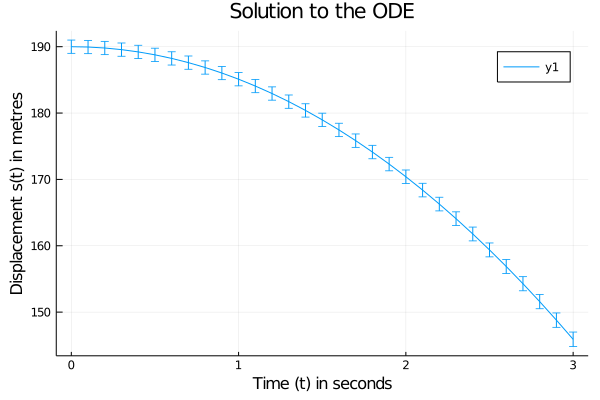

In [41]:
plot(
    solution.t,
    solution.u,
    title="Solution to the ODE",
    xaxis="Time (t) in seconds",
    yaxis="Displacement s(t) in metres"
)

## Interoperability

We can import any python module using the PyCall package:

In [42]:
using PyCall

In [43]:
math = pyimport("math")

PyObject <module 'math' (built-in)>

In [44]:
math.sqrt(100)

10.0

We can mix Python functions and variables with Julia code:

In [45]:
math.sin.([π,  math.pi, 2π,    2 * math.pi])

4-element Array{Float64,1}:
  1.2246467991473532e-16
  1.2246467991473532e-16
 -2.4492935982947064e-16
 -2.4492935982947064e-16

We can define Python functions that call Julia funcitons

In [46]:
py"""
def pyfib(n, fun):
    if n < 2:
        return n
    else:
        return fun(n - 1, pyfib) + fun(n - 2, pyfib)
"""

In [47]:
function jlfib(n, fun)
    if n < 2
        return n
    else
        return fun(n - 1, jlfib) + fun(n - 2, jlfib)
    end
end

jlfib (generic function with 1 method)

In [48]:
jlfib(20, py"pyfib")

6765

If you have some code written in another language (like Python), there can be a smooth transition to using Julia.

# Summary

- Julia looks a bit like Python
- It's fast (with some caveats)
- It's free!
- It's written in Julia
- It has powerful features like:
    - Broadcasting syntax
    - Unicode variables
    - Multiple dispatch
    - Good interoperability

Other stuff I haven't mentioned:
- Automatic differentiation (Swift also has this now)
- Metaprogramming
- Data science stuff (The first two letters of Jupyter Notebooks are named after Julia!)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*